# Smart Queue Monitoring System - Manufacturing Scenario

## Set Up

In [42]:
%env PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support
import os
import sys
sys.path.insert(0, os.path.abspath('/opt/intel_devcloud_support'))
sys.path.insert(0, os.path.abspath('/opt/intel'))

env: PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support


In [49]:
import videoHtml
videoHtml.videoHTML('Transportation', ['original_videos/Transportation.mp4'])

In [50]:
#Submit job to the queue
cpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te -F "/data/models/intel/person-detection-retail-0013/FP32/person-detection-retail-0013 CPU /data/resources/transportation.mp4 /data/queue_param/transportation.npy /output/results/transportation/cpu 15" -N store_core

print(cpu_job_id[0])

VkrQn1L4suaXGIEhGJs0p3a1ZROwxzNg


#### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [51]:
import liveQStat
liveQStat.liveQStat()

###### Get Results

Run the next cell to retrieve your job's results.

In [52]:
import get_results
get_results.getResults(cpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:VkrQn1L4suaXGIEhGJs0p3a1ZROwxzNg) are ready.
Please wait...Success!
output.tgz was downloaded in the same folder as this notebook.


###### Unpack your output files and view stdout.log

In [53]:
!tar zxf output.tgz

In [54]:
!cat stdout.log

Total People in frame = 8
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 6
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2

###### View stderr.log
This can be used for debugging

In [55]:
!cat stderr.log

person_detect.py:69: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


###### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [56]:
import videoHtml

videoHtml.videoHTML('Transportation CPU', ['results/transportation/cpu/output_video.mp4'])

In [57]:
#Submit job to the queue
gpu_job_id = !qsub queue_job.sh -d . -l nodes=tank-870:i5-6500te:intel-hd-530 -F "/data/models/intel/person-detection-retail-0013/FP32/person-detection-retail-0013 GPU /data/resources/transportation.mp4 /data/queue_param/transportation.npy /output/results/transportation/gpu 2" -N store_core
print(gpu_job_id[0])

IdXqO1sclFnWq1cko7zLdCGC9XwDaL4M


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [58]:
import liveQStat
liveQStat.liveQStat()

###### Get Results

Run the next cell to retrieve your job's results.

In [59]:
import get_results
get_results.getResults(gpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:IdXqO1sclFnWq1cko7zLdCGC9XwDaL4M) are ready.
Please wait...Success!
output.tgz was downloaded in the same folder as this notebook.


###### Unpack your output files and view stdout.log

In [60]:
!tar zxf output.tgz

In [61]:
!cat stdout.log

Total People in frame = 8
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 6
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2

###### View stderr.log
This can be used for debugging

In [62]:
!cat stderr.log

person_detect.py:69: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


###### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [63]:
import videoHtml

videoHtml.videoHTML('Transportation GPU', ['results/transportation/gpu/output_video.mp4'])

In [64]:
#Submit job to the queue
vpu_job_id = !qsub queue_job.sh -d . -l nodes=tank-870:i5-6500te:intel-ncs2 -F "/data/models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013 MYRIAD /data/resources/transportation.mp4 /data/queue_param/transportation.npy /output/results/transportation/vpu 2" -N store_core

print(vpu_job_id[0])

9ihSXVA5bco9bLHIzY2m82toKZWFdv3M


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [65]:
import liveQStat
liveQStat.liveQStat()

###### Get Results

Run the next cell to retrieve your job's results.

In [66]:
import get_results
get_results.getResults(vpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:9ihSXVA5bco9bLHIzY2m82toKZWFdv3M) are ready.
Please wait...Success!
output.tgz was downloaded in the same folder as this notebook.


###### Unpack your output files and view stdout.log

In [67]:
!tar zxf output.tgz

In [68]:
!cat stdout.log

Total People in frame = 8
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 6
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 7
Number of people in queue = {1: 2, 2: 0}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 2, 2

###### View stderr.log
This can be used for debugging

In [69]:
!cat stderr.log

person_detect.py:69: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


###### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [70]:
import videoHtml

videoHtml.videoHTML('Transportation VPU', ['results/transportation/vpu/output_video.mp4'])

In [71]:
#Submit job to the queue
fpga_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:iei-mustang-f100-a10 -F "/data/models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013 HETERO:FPGA,CPU /data/resources/transportation.mp4 /data/queue_param/transportation.npy /output/results/transportation/fpga 2" -N store_core
print(fpga_job_id[0])

S1BdGJR4q7fjf8VK29jLULSxEEy7d2UT


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [72]:
import liveQStat
liveQStat.liveQStat()

###### Get Results

Run the next cell to retrieve your job's results.

In [73]:
import get_results
get_results.getResults(fpga_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:S1BdGJR4q7fjf8VK29jLULSxEEy7d2UT) are ready.
Please wait...Success!
output.tgz was downloaded in the same folder as this notebook.


###### Unpack your output files and view stdout.log

In [74]:
!tar zxf output.tgz

In [75]:
!cat stdout.log

INTELFPGAOCLSDKROOT is set to /opt/altera/aocl-pro-rte/aclrte-linux64. Using that.

aoc was not found, but aocl was found. Assuming only RTE is installed.

AOCL_BOARD_PACKAGE_ROOT is set to /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2. Using that.
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/bin to PATH
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/linux64/lib to LD_LIBRARY_PATH
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/host/linux64/lib to LD_LIBRARY_PATH
Adding /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2/linux64/lib to LD_LIBRARY_PATH
[setupvars.sh] OpenVINO environment initialized
aocl program: Running program from /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2/linux64/libexec
Failed to open file: /opt/intel/openvino/bitstreams/a10_vision_design_sg1_bitstreams/2019R4_PL1_FP16_MobileNet_Clamp.aocx
Error: Failed to find aocx
aocl program: Program failed.
Total People in fr

###### View stderr.log
This can be used for debugging

In [76]:
!cat stderr.log

Couldn't open file /opt/intel/openvino/bitstreams/a10_vision_design_sg1_bitstreams/2019R4_PL1_FP16_MobileNet_Clamp.aocx for reading
person_detect.py:69: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


###### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [77]:
import videoHtml

videoHtml.videoHTML('Transportation FPGA', ['results/transportation/fpga/output_video.mp4'])


## Assess Performance


In [78]:
import matplotlib.pyplot as plt

device_list=['cpu', 'gpu', 'fpga', 'vpu']
inference_time=[]
fps=[]
model_load_time=[]

for device in device_list:
    with open('results/transportation/'+device+'/stats.txt', 'r') as f:
        inference_time.append(float(f.readline().split("\n")[0]))
        fps.append(float(f.readline().split("\n")[0]))
        model_load_time.append(float(f.readline().split("\n")[0]))

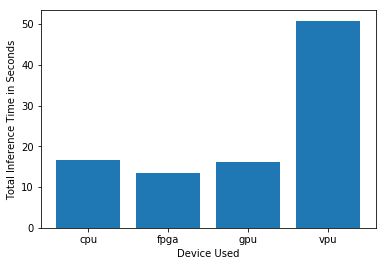

In [79]:
plt.bar(device_list, inference_time)
plt.xlabel("Device Used")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

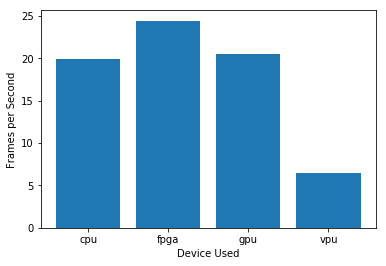

In [80]:
plt.bar(device_list, fps)
plt.xlabel("Device Used")
plt.ylabel("Frames per Second")
plt.show()

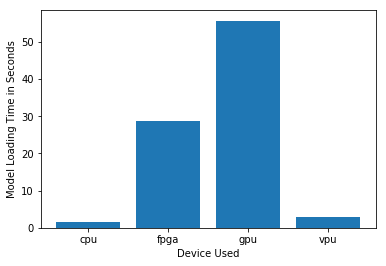

In [81]:
plt.bar(device_list, model_load_time)
plt.xlabel("Device Used")
plt.ylabel("Model Loading Time in Seconds")
plt.show()